In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the .zarr file
zarr_path = "memory_v9.zarr"  # Replace with your actual file path
data = zarr.open(zarr_path, mode='r')

print(data.tree())

/
 ├── data
 │   ├── action (6473, 2) float32
 │   ├── img (6473, 96, 96, 3) uint8
 │   ├── n_contacts (6473, 1) float32
 │   └── state (6473, 5) float32
 └── meta
     └── episode_ends (100,) int64


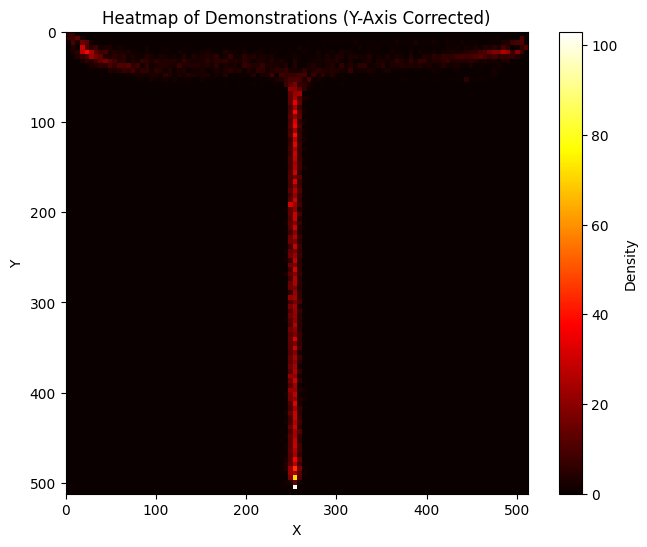

In [17]:
# Extract the state data and episode ends
states = np.array(data['data']['state'])  # Shape: (5163, 5)
episode_ends = np.array(data['meta']['episode_ends'])  # Shape: (100,)

# Split the states into episodes and combine all points into a single array
start_idx = 0
all_points = []
for end_idx in episode_ends:
    episode = states[start_idx:end_idx]
    all_points.append(episode[:, :2])  # Assuming the first two columns are x and y
    start_idx = end_idx

all_points = np.vstack(all_points)  # Combine into a single array of shape (N, 2)

# Flip the y-axis for the environment's coordinate system
all_points[:, 1] *= -1  # Flip the y-axis data

# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(
    all_points[:, 0], all_points[:, 1], bins=100
)

# Flip the y-axis labels by reversing the extent for the y-axis
plt.figure(figsize=(8, 6))
plt.imshow(
    heatmap.T, origin='upper', cmap='hot',
    extent=[0, 512, 0, 512]  # Ensure extent maps y-axis correctly
)
plt.title("Heatmap of Demonstrations (Y-Axis Corrected)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Density")
plt.gca().invert_yaxis()  # Ensure top-left origin for the environment
plt.show()
